In [1]:
import pandas as pd
import numpy as np
import os.path
from os import path
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

pd.set_option('display.max_rows', 500)

In [2]:
import sqlite3
conn = sqlite3.connect('sqlite-database.db')


In [3]:
contributions = pd.read_sql_query("SELECT * from github_contribution", conn, parse_dates=["date"])
query = '''
select githubid, asf_user_project.*
from github_asf
         left join asf_user_project
                   on github_asf.asfid = asf_user_project.asfid
WHERE project = 'ozone'
'''
github_apache_membership = pd.read_sql_query(query, conn)

In [4]:
contributions = contributions[~contributions.author.isin(["hadoop-yetus"])]

Latest record from the dataset:

In [5]:
contributions.sort_values("date", ascending=False).head(1)
# contributions = contributions[contributions.date > '2020-06-01']

,org,repo,identifier,type,subidentifier,date,author,owner
27770,apache,ozone,2168,PR_COMMENTED,824575283,2021-04-22 06:26:51+00:00,bharatviswa504,adoroszlai


## Contributors per participations in PRs which are not created by self (helping PRs)

In [6]:
c = contributions[contributions.author != contributions.owner][["identifier","author"]].groupby(["identifier","author"]).count() \
   .reset_index().groupby("author").count()
c.sort_values("identifier",ascending=False).head(20)

,identifier
author,
adoroszlai,611
elek,556
bharatviswa504,446
xiaoyuyao,396
anuengineer,297
arp7,262
bshashikant,215
avijayanhwx,182
mukul1987,172


## Contributors per participations in any PRs

In [7]:
c = contributions[["identifier","author"]].groupby(["identifier","author"]).count() \
   .reset_index().groupby("author").count()
c.sort_values("identifier",ascending=False).head(20)

,identifier
author,
adoroszlai,953
elek,845
bharatviswa504,687
xiaoyuyao,472
bshashikant,306
anuengineer,306
avijayanhwx,300
arp7,273
mukul1987,237


## People with created PRs > reviewed/commented PRS

In [8]:
created = contributions[contributions.type == "PR_CREATED"][["author","identifier"]].groupby("author").count().rename(columns={"identifier":"created"})
helped = contributions[contributions.author != contributions.owner][["identifier"]].groupby([contributions.author,contributions.identifier]).sum().rename(columns={"identifier":"helped"}) \
  .reset_index().groupby(["author"]).count().drop(columns=["identifier"])
merged = pd.merge(helped,created, left_index=True, right_index=True)

merged.index = merged.index.rename("githubid")
merged = merged.join(github_apache_membership.set_index("githubid")).reset_index()
merged.role = merged.role.fillna("?")
merged["rc"] = merged.role.map({"pmc":"red","committer":"yellow","?":"blue"})


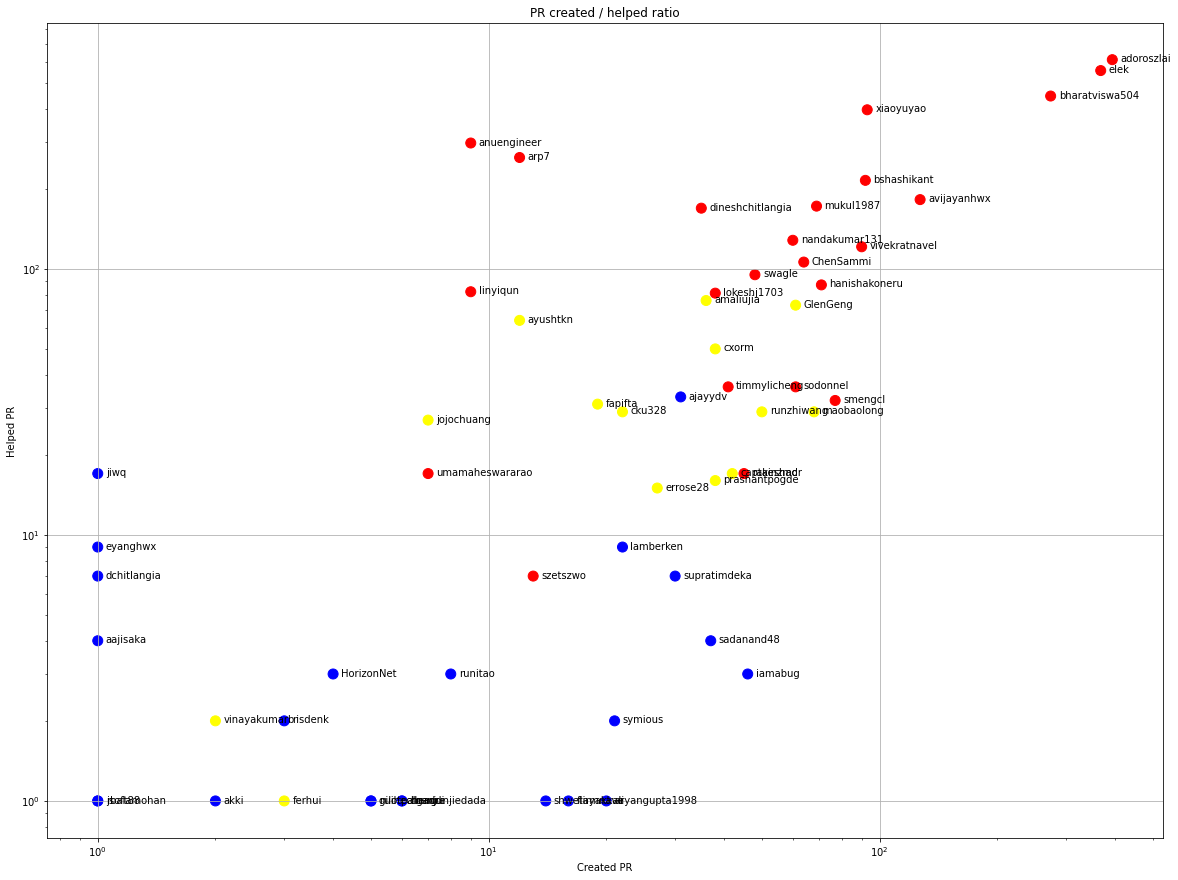

In [9]:
source = merged.reset_index()

plt.figure(figsize=(20,15))

plt.scatter(source.created,source.helped,color=source.rc, s= 100)

plt.xlabel('Created PR')
plt.ylabel('Helped PR')
plt.title('PR created / helped ratio')
plt.grid()

for index, row in source.iterrows():
     plt.annotate(row["githubid"], (row["created"], row["helped"]), xytext=(8,-2), textcoords='offset points')
plt.semilogx()
plt.semilogy()
plt.show()

## Same graph with focusing to the last 6 month

Only contributors with both created pr and helped pr visible

In [10]:
import datetime

filtered = contributions[contributions.date > (datetime.datetime.now() - datetime.timedelta(days=182)).strftime('%Y-%m-%d')]
created = filtered[filtered.type == "PR_CREATED"][["author","identifier"]].groupby("author").count().rename(columns={"identifier":"created"})
helped = filtered[filtered.author != filtered.owner][["identifier"]].groupby([filtered.author,filtered.identifier]).sum().rename(columns={"identifier":"helped"}) \
  .reset_index().groupby(["author"]).count().drop(columns=["identifier"])
merged = pd.merge(helped,created,left_index=True, right_index=True)

merged.index = merged.index.rename("githubid")
merged = merged.join(github_apache_membership.set_index("githubid")).reset_index()
merged.role = merged.role.fillna("?")
merged["rc"] = merged.role.map({"pmc":"red","committer":"yellow","?":"blue"})
merged = merged.fillna(0)

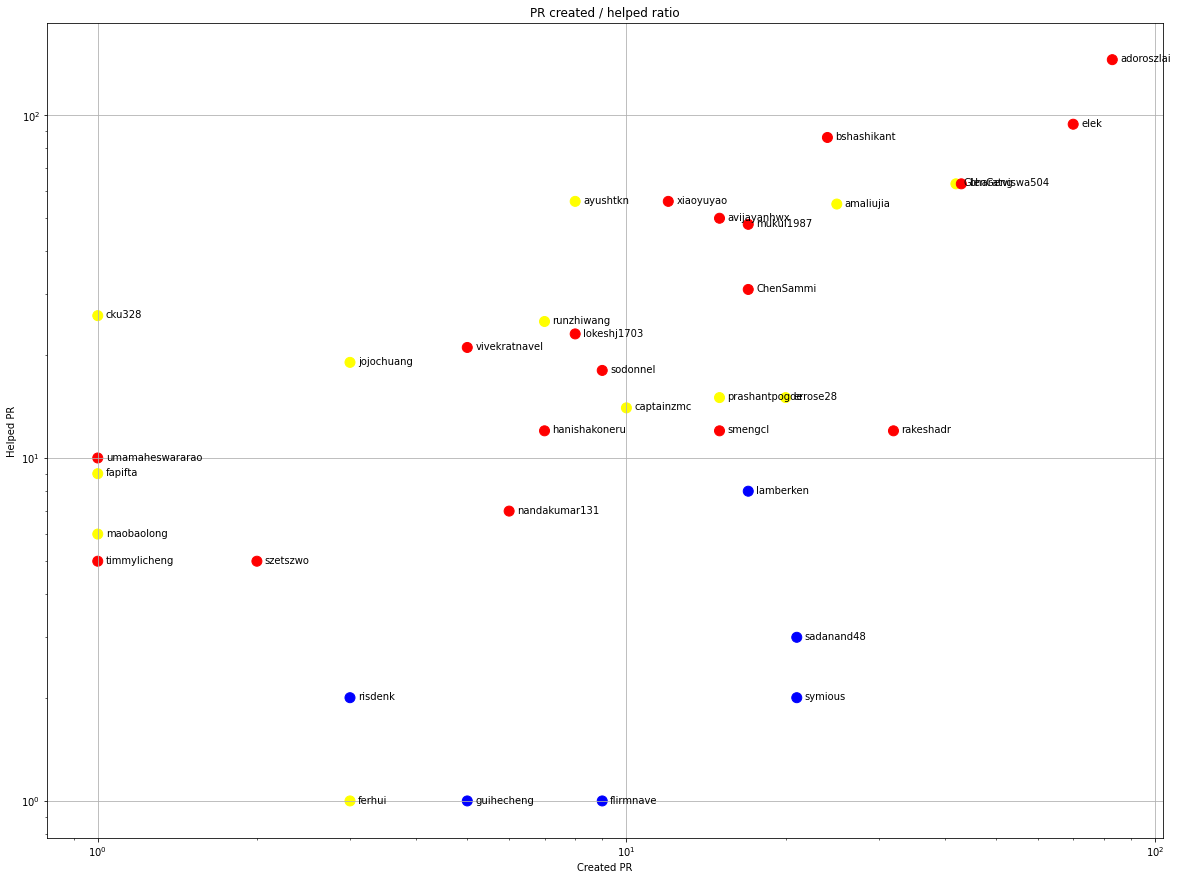

In [11]:
source = merged.reset_index()

plt.figure(figsize=(20,15))

plt.scatter(source.created,source.helped,color=source.rc, s= 100)

plt.xlabel('Created PR')
plt.ylabel('Helped PR')
plt.title('PR created / helped ratio')
plt.grid()

for index, row in source.iterrows():
    plt.annotate(row["githubid"], (row["created"], row["helped"]), xytext=(8,-2), textcoords='offset points')
        
plt.semilogx()
plt.semilogy()
plt.show()


,author,identifier,asfid,project,role
17,iamabug,46,NaN,NaN,NaN
24,sadanand48,37,NaN,NaN,NaN
27,ajayydv,31,NaN,NaN,NaN
28,supratimdeka,30,NaN,NaN,NaN
31,lamberken,22,NaN,NaN,NaN
32,symious,21,NaN,NaN,NaN
33,aryangupta1998,20,NaN,NaN,NaN
35,abhishekaypurohit,17,NaN,NaN,NaN
36,flirmnave,16,NaN,NaN,NaN
37,sky76093016,14,NaN,NaN,NaN


## People with created prs but no project membership

In [12]:
x = contributions[["identifier"]][contributions.type == "PR_CREATED"].groupby(contributions.author).count().sort_values("identifier", ascending=False)
merged = x.join(github_apache_membership.set_index("githubid")).reset_index()
merged[merged.role.isna()].head(20)

,author,identifier,asfid,project,role
17,iamabug,46,NaN,NaN,NaN
24,sadanand48,37,NaN,NaN,NaN
27,ajayydv,31,NaN,NaN,NaN
28,supratimdeka,30,NaN,NaN,NaN
31,lamberken,22,NaN,NaN,NaN
32,symious,21,NaN,NaN,NaN
33,aryangupta1998,20,NaN,NaN,NaN
35,abhishekaypurohit,17,NaN,NaN,NaN
36,flirmnave,16,NaN,NaN,NaN
37,sky76093016,14,NaN,NaN,NaN
